# Variasi Jendela

## Fungsi jendela
Sinyal analog atau diskrit waktu tak terbatas memiliki spektrum sinusoidal yang merupakan fungsi delta pada frekuensi sinyal. Namun, dalam praktiknya, spektrum sinyal harmonik yang dibatasi waktu nyata setara dengan fungsi.


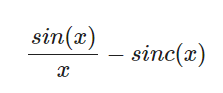

Lebar lobe utama dalam domain frekuensi Transformasi Fourier dari sinyal bergantung pada interval waktu analisis sinyal T. Batas waktu ini sebenarnya merupakan perkalian sinyal dengan selubung persegi atau.

Mengalikan sinyal dalam domain waktu sama dengan mengalikan spektrumnya dalam domain frekuensi.

Oleh karena itu, spektrum  sinyal harmonik  dibatasi oleh selubung persegi yang setara dengan ~sinc (x).

Hal ini juga terkait dengan fakta bahwa kita tidak dapat mengintegrasikan sinyal dalam periode waktu yang tidak terbatas, dan Transformasi Fourier dalam bentuk diskrit, yang dinyatakan sebagai bilangan berhingga, karena dibatasi oleh bilangan sampel.



Biasanya, panjang FFT (Fast Fourier Transform) pada perangkat pemrosesan sinyal digital modern mengambil nilai N_FFT dari 8 hingga beberapa juta poin.

Dengan membatasi sinyal ke N interval, kami secara efektif menerapkan “jendela” persegi panjang dengan durasi sampel N.

Oleh karena itu, spektrum yang diperoleh adalah spektrum sinyal harmonik  dikalikan dengan selubung persegi panjang.



Berikut adalah contoh spektrum dari sinyal harmonik pendek dengan parameter berikut: panjang sinyal N = 256, panjang FFT N_FFT = 2048.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftshift
import scipy.signal as sig

FONT_SMALL = 12
FONT_MEDIUM = 14

plt.rc('axes', titlesize=FONT_MEDIUM)
plt.rc('axes', labelsize=FONT_SMALL)
plt.rc('xtick', labelsize=FONT_SMALL)
plt.rc('ytick', labelsize=FONT_SMALL)
plt.rc('legend', fontsize=FONT_MEDIUM)
plt.rc('figure', titlesize=FONT_MEDIUM)

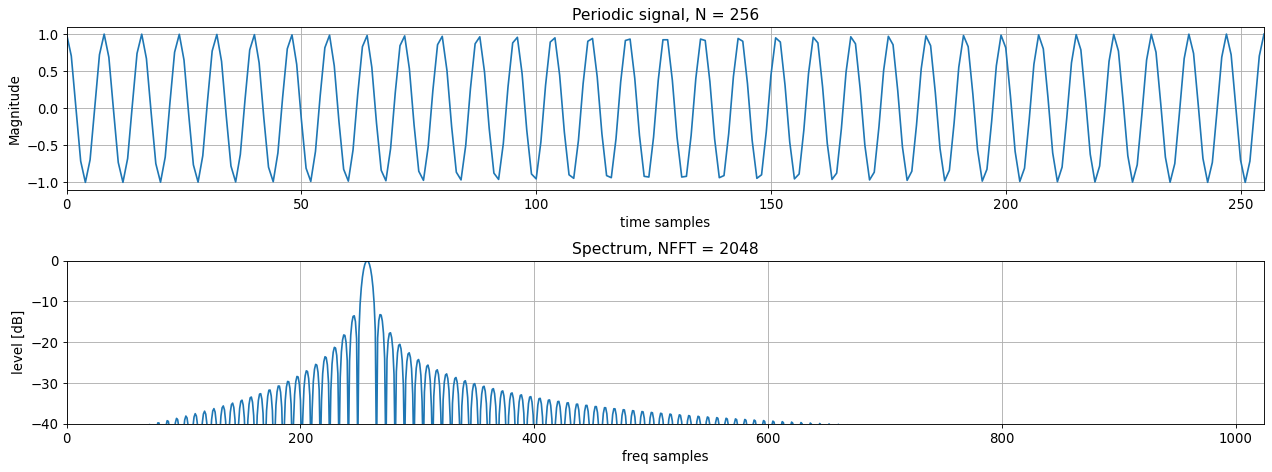

In [ ]:
# Input parameters
N = 256
NFFT = 2048

# Input signal (long: N >> NFFT)
tt = np.linspace(0, 1, N, endpoint=True)
xx = np.cos(2*np.pi*32*tt)

# Calculate FFT
sft = np.abs(fft(xx, NFFT))
slg = 20*np.log10(sft / np.max(sft))

plt.figure(figsize=(16, 6), dpi=80)
plt.subplot(2,1,1)
plt.title('Periodic signal, N = {}'.format(N))
plt.xlabel('time samples')
plt.ylabel('Magnitude')
plt.plot(xx)
plt.xlim([0, N-1])
plt.grid(True)

plt.subplot(2,1,2)
plt.title('Spectrum, NFFT = {}'.format(NFFT))
plt.xlabel('freq samples')
plt.ylabel('level [dB]')
plt.plot(slg)
plt.xlim([0, NFFT//2])
plt.ylim([-40, 0])
plt.grid(True)
plt.tight_layout()

Terlihat bahwa spektrum  sinyal harmonik pendek dalam kehidupan nyata tidak setara dengan fungsi delta tetapi lebih mirip dengan konvolusi spektrum gelombang persegi dan sinyal harmonik. Pada grafik, hanya separuh domain frekuensi yang terwakili. Sinyal akhir simetris pada sekitar setengah frekuensi sampling atau parameter 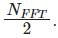


Perlu diingat bahwa spektrum sinyal persegi setara dengan ekspresi ~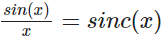 . Artinya, spektrum sinyal persegi tampaknya "tersusun" di atas delta function pada frekuensi sinyal. Sementara pengaruh jendela persegi berkurang, durasi sinyal harmonik diperpanjang dalam domain waktu, spektrumnya cenderung menjadi delta function pada frekuensi sinyal tersebut.

Oleh karena itu, penerapan "jendela" persegi panjang disebabkan oleh pembatasan sinyal dalam waktu. Pada contoh berikut, durasi sinyal secara signifikan meningkat (N = 65536).

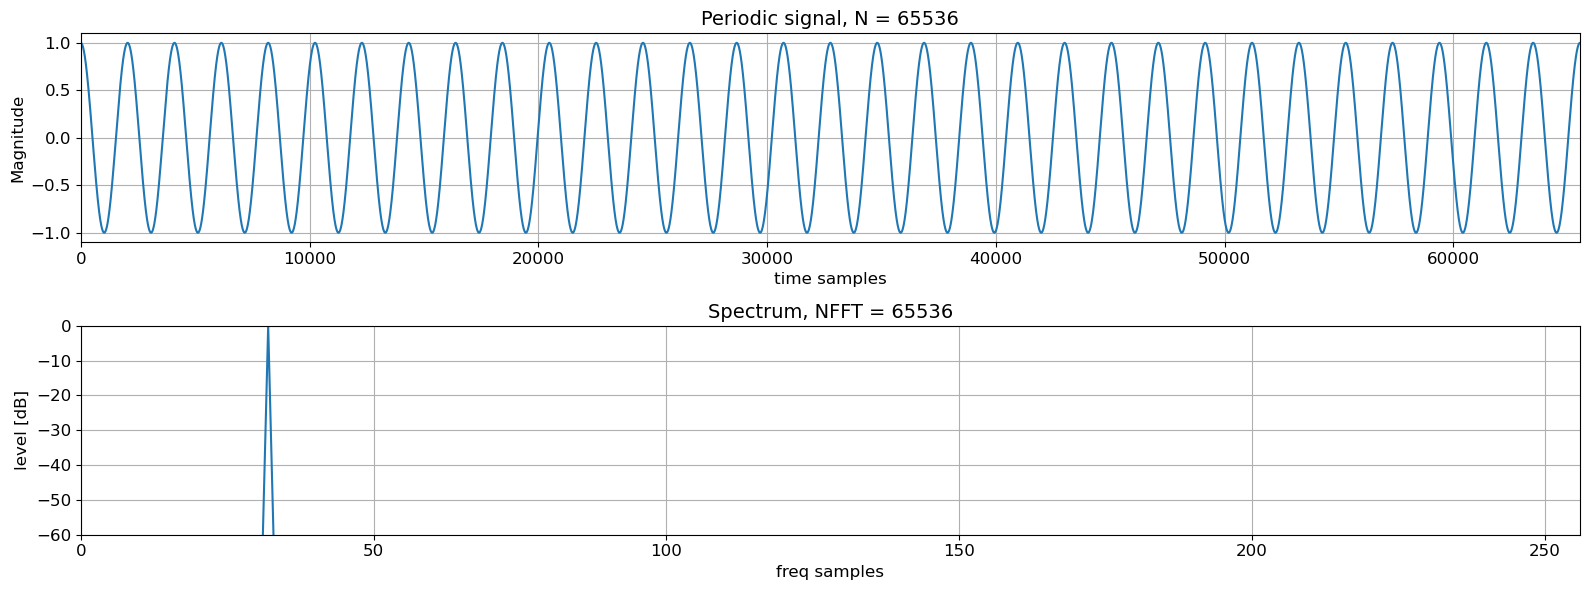

In [ ]:
N = 65536

tt = np.linspace(0, 1, N, endpoint=True)
xx = np.cos(2*np.pi*32*tt)

sft = np.abs(fft(xx, N))
slg = 20*np.log10(sft / np.max(sft))

plt.figure(figsize=(16, 6))
plt.subplot(2,1,1)
plt.title('Periodic signal, N = {}'.format(N))
plt.xlabel('time samples')
plt.ylabel('Magnitude')
plt.plot(xx)
plt.xlim([0, N-1])
plt.grid(True)

plt.subplot(2,1,2)
plt.title('Spectrum, NFFT = {}'.format(N))
plt.xlabel('freq samples')
plt.ylabel('level [dB]')
plt.plot(slg)
plt.xlim([0, N//256])
plt.ylim([-60, 0])
plt.grid(True)
plt.tight_layout()

Sayangnya, penggunaan sinyal yang tak terbatas tidak mungkin dan membutuhkan waktu yang lama dalam kehidupan nyata

### Fungsi Jendela

Untuk masalah pemrosesan sinyal digital, berbagai jendela telah dikembangkan untuk digunakan pada sinyal dalam domain waktu. Ini meningkatkan kualitas spektralnya secara kualitatif. Banyaknya jenis jendela ini sebagian besar disebabkan oleh salah satu fitur utama yang dimiliki oleh setiap aplikasi jendela. Hubungan antara tingkat penekanan lobus samping dan lebar lobus utama menunjukkan sifat ini.

Aturan: Lobus utama spektrum lebih lebar jika penekanan lobus sampingnya lebih besar, dan sebaliknya.

Bayangkan sinyal yang dibagi menjadi beberapa urutan yang masing-masing diolah secara terpisah sebelum digabungkan kembali menjadi satu sinyal. Jendela persegi digunakan saat melakukan FFT. Akibatnya, distorsi bentuk sinyal di persimpangan—juga dikenal sebagai lompatan sinyal—dapat dihasilkan oleh pemulihan bentuk sinyal. Filter jendela dapat digunakan untuk meratakan lonjakan ini.

Dengan menekan tingkat lobus samping, fungsi jendela dapat mendeteksi sinyal lemah di antara sinyal yang lebih kuat. Antara lain, segitiga, sinusoidal, Lanczos, Hann, Hamming, Blackman, Harris, Blackman-Harris, jendela dengan puncak datar, jendela Nuttall, Gauss, Kaiser, dan banyak lagi merupakan fungsi jendela penting dalam masalah pemrosesan sinyal digital. Sebagian besar dari mereka diungkapkan dalam deretan hingga dengan menggunakan koefisien bobot tertentu untuk menggabungkan sinyal harmonik. Sinyal-sinyal ini dapat digunakan pada perangkat keras apa pun, seperti circuit logic yang dapat diprogram atau prosesor sinyal.

Fungsi jendela dengan bentuk kompleks dihitung dengan mengambil eksponensial (jendela Gauss) atau fungsi Bessel yang dimodifikasi (jendela Kaiser). Menghitung fungsi Bessel atau eksponensial memerlukan tabel yang enkode satu nilai ke nilai lain.

### Koefisien Penekanan

Jelas bahwa ketika sinyal dikalikan dengan fungsi jendela, amplitudo osilasi yang dihasilkan akan berubah.

Dalam masalah pemrosesan sinyal digital,  konsep koefisien penekanan diperkenalkan, yang menggambarkan penekanan sinyal selama pemfilteran jendela dibandingkan dengan menggunakan jendela persegi.

Rumus untuk menghitung koefisien penekanan:


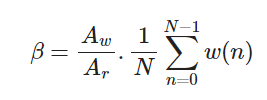

- Aw: level dari kontribusi konstan dari fungsi jendela,
- Ar: level dari kontribusi konstan dari jendela persegi,
- w(n): sampel dari fungsi jendela,
- N: panjang fungsi jendela.

Dengan menggunakan python, definisikan fungsi yang akan menampilkan fungsi jendela:

In [ ]:
def dft_win(w):
    """
    Plot window function and spectrum of the window

    Parameters
    ----------
    w : np.array
        input window vector
    """

    # Find length of window
    N = len(w)
    # FFT size
    NFFT = 2**12
    # Calculate FFT
    W = fftshift(fft(w, NFFT))
    # Find max and add minimum floating-point value (except divide-by-zero)
    W = W / np.amax(W) + np.nextafter(0,1)
    tt = np.linspace(-1, 1, NFFT)

    # plot window function and its spectrum
    fig = plt.figure(figsize=(16, 6))

    plt.subplot(2,1,1)
    plt.stem(w, basefmt='C0')
    plt.title('Window fucntion')
    plt.xlabel('Samples')
    plt.ylabel(r'$w[k]$')
    plt.xlim([0, N-1])
    plt.grid(True)

    plt.subplot(2,1,2)
    plt.plot(tt, 20*np.log10(np.abs(W)))
    plt.title('Spectrum')
    plt.xlabel('Frequency')
    plt.ylabel('Level in dB')
    plt.axis([-1, 1, -120, 2])
    plt.grid(True)
    plt.tight_layout()

### Fungsi Jendela Utama


Berikut adalah ekspresi untuk fungsi jendela utama. Durasi dari fungsi jendela adalah N, w(n) adalah sampel dari fungsi jendela. Di dalam pustaka scipy dari Python, semua jendela yang umum digunakan tersedia di dalam paket sinyal. Cara untuk memanggilnya cukup sederhana. Selanjutnya, dalam bentuk tabel dan grafik, akan ditunjukkan efektivitas relatif dari berbagai jendela.

Aturan: jumlah dari modulus koefisien fungsi jendela sama dengan satu!

## Jendela Persegi

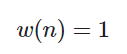


Jendela paling sederhana, memiliki karakteristik terburuk dan secara otomatis dihasilkan saat mereduksi rangkaian menjadi N sampel. Tingkat maksimum dari sisi gelombang (SBG) karakteristik frekuensi jendela persegi adalah -13 dB.

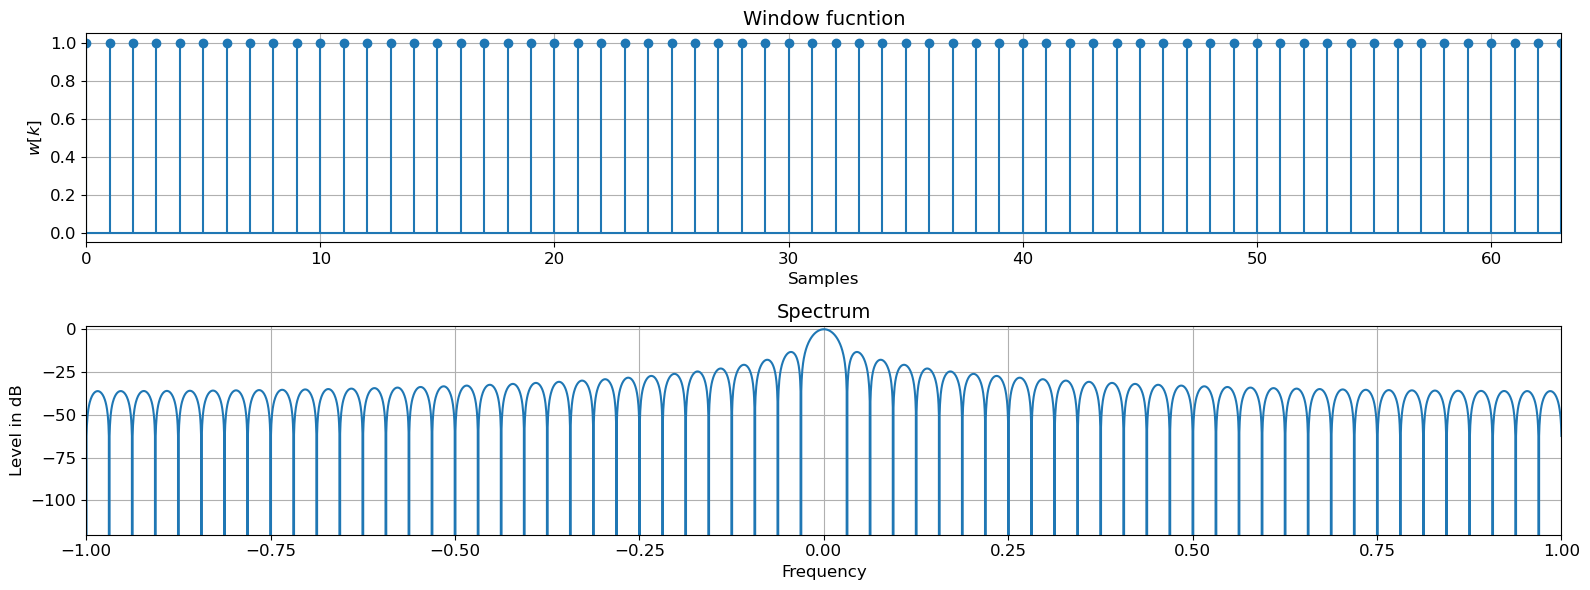

In [ ]:
N = 64
dft_win(np.ones(N))

## Jendela Segitiga

Biasanya dikenal sebagai jendela Bartlett.

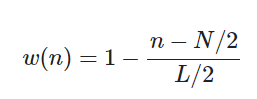

Dimana L = N, N+1, N+2

Maksimum Tingkat Sisi Gelombang: -26 dt(M)

## Jendela Sinusoidal

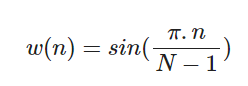

M
Mudah dalam hal implementasi perangkat lunak dan keras. Tingkat maksimum sisi gelombang dari jendela sinusoidal adalah -23 d

## Jendela Hann (atau Hanning)

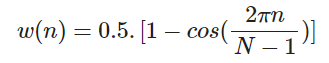

Jendela Hann (atau Hanning), juga dikenal sebagai jendela Blackman-Harris orde kedua.
Maksimum Tingkat Sisi Gelombang: -31,5 dB.

## Jendela Hamming

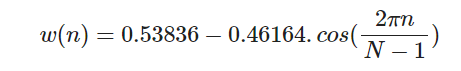

Maksimum Tingkat Sisi Gelombang: -42 dB.

## Jendela Blackman

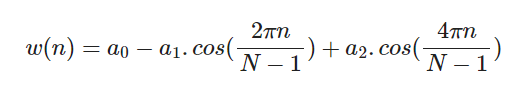

dimana 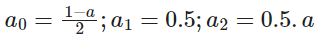

Pada α=0.16, maksimum tingkat sisi gelombang -58dB.

## Jendela Blackman-Harris
Dibentuk dengan menjumlahkan empat suku (yaitu jendela orde keempat).

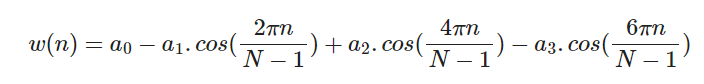

dimana 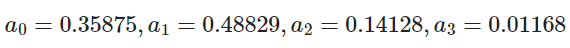

Maksimum level sisi gelombang: -92 dB.

## Jendela Blackman-Nuttall

Rumusnya mirip dengan jendela Blackman-Harris. Perbedaannya hanya dalam koefisien. Dibentuk sebagai jumlah empat suku.

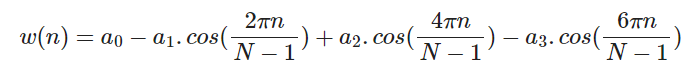

dimana Screenshot 2024-05-07 210008.png

Tingkat maksimum gelombang samping: -93 dB.

## Jendela Datar Puncak (Flat-Top Window).

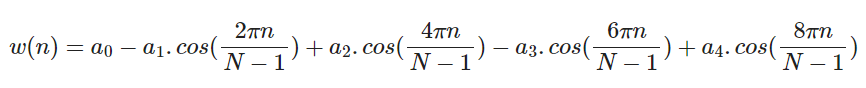

dimana

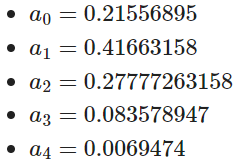

Maksimum level lobe samping: -70 dB.

## Jendela Kaiser

Bervariasi dengan parameter α, yang menentukan tingkat penurunan dan kemiringan karakteristik frekuensi. Okna Kaiser adalah jenis okna serbaguna yang memungkinkan Anda memilih parameter filtrasi untuk berbagai jenis tugas.

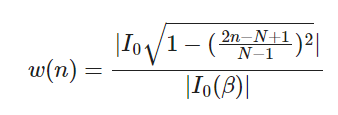

Dimana

- Io adalah modifikasi fungsi Bessel dari jenis pertama, orde nol.
- β adalah koefisien yang menentukan seberapa besar energi yang terkonsentrasi di dalam main lobe (lembayung utama) dari fungsi jendela spektrum.

Semakin besar β, semakin besar rasio energi pada lobe utama dan semakin lebar lobe utama.

Oleh karena itu, semakin rendah tingkat side-lobe.

Dalam praktiknya, fungsi Kaiser sebenarnya tidak diimplementasikan pada perangkat keras namun digunakan pada tingkat perangkat lunak (menghitung koefisien filter FIR).

Dalam kasus praktis, nilai β yang digunakan berkisar antara 5 hingga 11.



## Jendela Gauss

Ditentukan oleh fungsi eksponensial dan variasi parameter dispersi (standar deviasi).

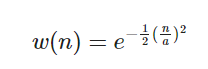

Karakteristik frekuensi jendela bergantung pada parameter α.

Semakin besar  α, semakin lebar lobe utama, tetapi semakin tinggi tingkat side-lobe.

Dalam praktiknya, jendela Gauss sebenarnya tidak diimplementasikan pada perangkat keras tetapi digunakan secara terprogram, misalnya dalam perhitungan koefisien filter FIR.



### Fungsi Jendela dalam numpy

Berikut adalah fungsi jendela terbatas.

- bartlett(M) - fungsi segitiga,
- blackman(M) - fungsi Blackman,
- hamming(M) - jendela Hamming,
- hanning(M) - jendela Hanning atau Hann,
- kaiser(M, beta) - jendela Kaiser.

Berbeda dengan paket numpy, paket scipy memperluas kemampuan filtrasi jendela, seperti yang terlihat dalam contoh-contoh di atas, dan menambahkan fungsionalitas.

### Spektrum Fungsi Jendela Utama.

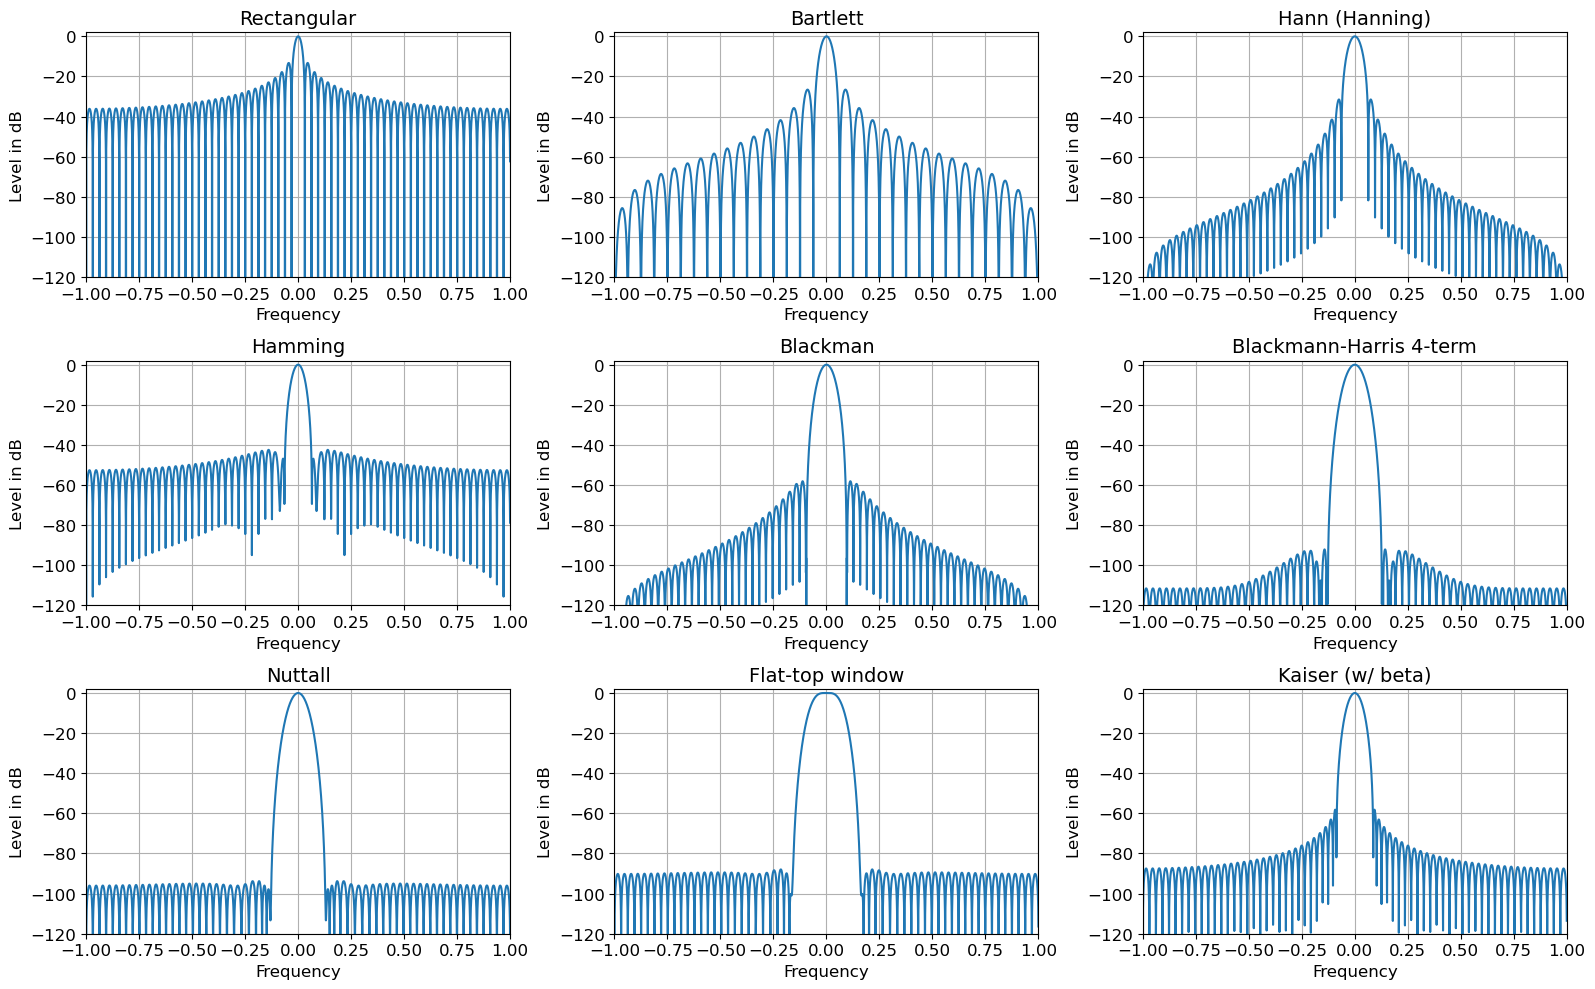

In [ ]:
NFFT = 2**12
# Calculate FFT
WW = fft(ww, NFFT, axis=0)
WW = WW / np.amax(WW, axis=0) + np.nextafter(0,1)

tt = np.linspace(-1, 1, NFFT)

# Plot window function and its spectrum
fig2 = plt.figure(figsize=(16, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.plot(tt, 20*np.log10(np.abs(fftshift(WW[:,i]))))
    plt.title(lst_titles[i])
    plt.xlabel('Frequency')
    plt.ylabel('Level in dB')
    plt.axis([-1, 1, -120, 2])
    plt.grid(True)
plt.tight_layout()

### Pencarian Sinyal Lemah

Sebelumnya disebutkan bahwa dengan menggunakan filtrasi jendela, kita dapat mengekstraksi sinyal-sinyal lemah di tengah-tengah sinyal yang lebih kuat. Mari kita buktikan hal ini dengan membangun grafik dari jumlah dua sinyal harmonis, yang frekuensinya berdekatan dan memiliki perbedaan amplitudo yang signifikan.